# Setting

### Run: ./eval_logits.py

### We evaluate on wikitext text dataset, text 2179 sentences, with 418776 tokens
### Saturate event: the max logits index doesn't change for deep layers and the same as last prediction
### For each token we compute the saturate event happened on which layer





# GPT2 result

### Average Saturate Event **76741/418776**, Percentage:**0.18325197606497368**
### Saturate event count for each layer[ 27840.   1350.   2103.   3551.   5116.   5654.  4797.  8554.   9080. 8879.   5894. 335958.]

# Aligned GPT2 result

### Average Saturate Event 199820/418776, Percentage:0.47715376217980193
### Saturate event count for each layer[ 44636.  21181.  11975.  11000.   9946.  16599.  19712.  13938.  13235. 16897.  20701. 218956.]

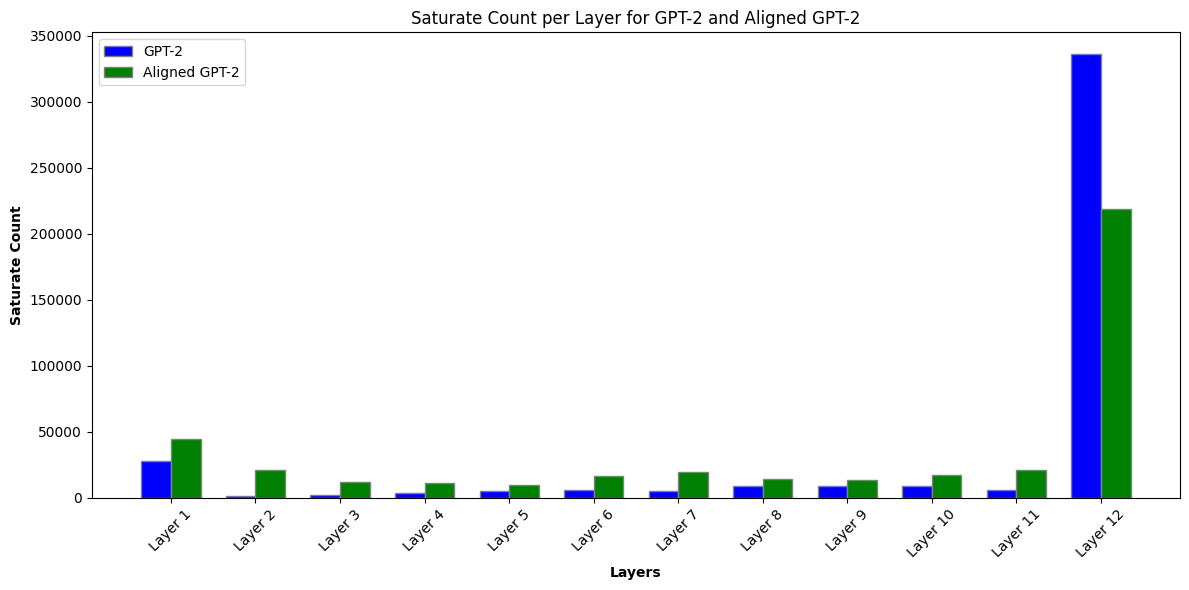

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
gpt2 = [27840, 1350, 2103, 3551, 5116, 5654, 4797, 8554, 9080, 8879, 5894, 335958]
aligned_gpt2 = [44636, 21181, 11975, 11000, 9946, 16599, 19712, 13938, 13235, 16897, 20701, 218956]

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(gpt2))]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(gpt2))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, gpt2, color='blue', width=bar_width, edgecolor='grey', label='GPT-2')
plt.bar(r2, aligned_gpt2, color='green', width=bar_width, edgecolor='grey', label='Aligned GPT-2')

# Add labels
plt.xlabel('Layers', fontweight='bold')
plt.ylabel('Saturate Count', fontweight='bold')
plt.title('Saturate Count per Layer for GPT-2 and Aligned GPT-2')
plt.xticks([r + bar_width/2 for r in range(len(gpt2))], labels, rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



{-11: 3733, -10: 1258, -9: 1420, -8: 1266, -7: 1388, -6: 1572, -5: 1608, -4: 1883, -3: 2613, -2: 3616, -1: 6345, 0: 225967, 1: 20781, 2: 17812, 3: 14921, 4: 16732, 5: 21769, 6: 15320, 7: 12106, 8: 10902, 9: 9256, 10: 12619, 11: 13889}


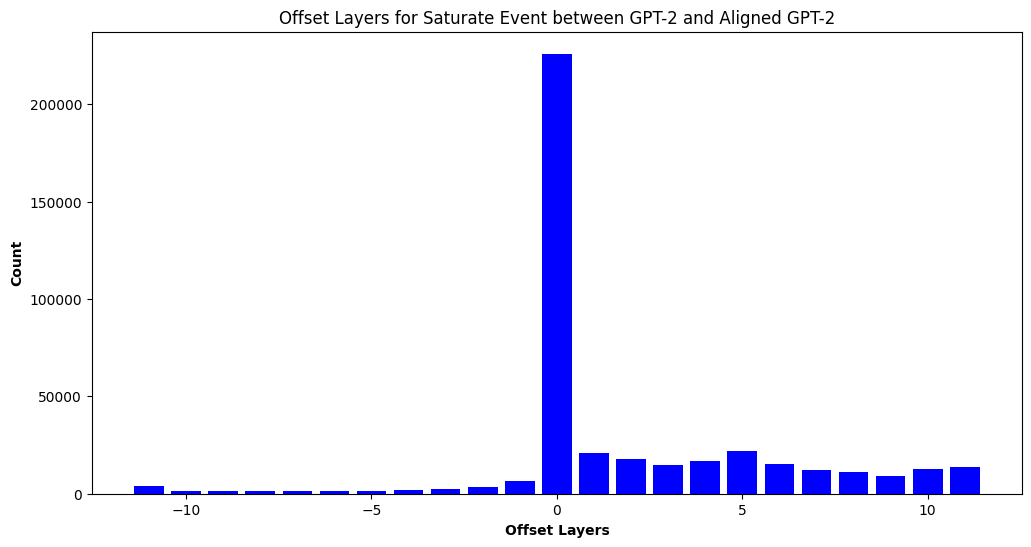

In [11]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='blue')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Aligned GPT-2 relative to GPT-2')
plt.show()


